In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Import files 

In [2]:
import implementations
from implementations import *

import load
from load import *

import validation 
from validation import *

import helpers 
from helpers import *

import feature_selection
from feature_selection import *

## Load the data


In [3]:
import pandas as pd

pd.set_option('display.max_columns', None)
df = pd.read_csv('train.csv')

print(pd.Series({"Memory usage": "{:.4f} MB".format(df.memory_usage().sum()/(1024*1024)),
                 "Dataset shape": "{}".format(df.shape)}).to_string())
df.head(30)

Memory usage       61.0353 MB
Dataset shape    (250000, 32)


,Id,Prediction,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,100000,s,138.470,51.655,97.827,27.980,0.910,124.711,2.666,3.064,41.928,197.760,1.582,1.396,0.200,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.240,-2.475,113.497
1,100001,b,160.937,68.768,103.235,48.146,-999.000,-999.000,-999.000,3.473,2.078,125.157,0.879,1.414,-999.000,42.014,2.039,-3.011,36.918,0.501,0.103,44.704,-1.916,164.546,1,46.226,0.725,1.158,-999.000,-999.000,-999.000,46.226
2,100002,b,-999.000,162.172,125.953,35.635,-999.000,-999.000,-999.000,3.148,9.336,197.814,3.776,1.414,-999.000,32.154,-0.705,-2.093,121.409,-0.953,1.052,54.283,-2.186,260.414,1,44.251,2.053,-2.028,-999.000,-999.000,-999.000,44.251
3,100003,b,143.905,81.417,80.943,0.414,-999.000,-999.000,-999.000,3.310,0.414,75.968,2.354,-1.285,-999.000,22.647,-1.655,0.010,53.321,-0.522,-3.100,31.082,0.060,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
4,100004,b,175.864,16.915,134.805,16.405,-999.000,-999.000,-999.000,3.891,16.405,57.983,1.056,-1.385,-999.000,28.209,-2.197,-2.231,29.774,0.798,1.569,2.723,-0.871,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
5,100005,b,89.744,13.550,59.149,116.344,2.636,284.584,-0.540,1.362,61.619,278.876,0.588,0.479,0.975,53.651,0.371,1.329,31.565,-0.884,1.857,40.735,2.237,282.849,3,90.547,-2.412,-0.653,56.165,0.224,3.106,193.660
6,100006,s,148.754,28.862,107.782,106.130,0.733,158.359,0.113,2.941,2.545,305.967,3.371,1.393,0.791,28.850,1.113,2.409,97.240,0.675,-0.966,38.421,-1.443,294.074,2,123.010,0.864,1.450,56.867,0.131,-2.767,179.877
7,100007,s,154.916,10.418,94.714,29.169,-999.000,-999.000,-999.000,2.897,1.526,138.178,0.365,-1.305,-999.000,78.800,0.654,1.547,28.740,0.506,-1.347,22.275,-1.761,187.299,1,30.638,-0.715,-1.724,-999.000,-999.000,-999.000,30.638
8,100008,b,105.594,50.559,100.989,4.288,-999.000,-999.000,-999.000,2.904,4.288,65.333,0.675,-1.366,-999.000,39.008,2.433,-2.532,26.325,0.210,1.884,37.791,0.024,129.804,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
9,100009,s,128.053,88.941,69.272,193.392,-999.000,-999.000,-999.000,1.609,28.859,255.123,0.599,0.538,-999.000,54.646,-1.533,0.416,32.742,-0.317,-0.636,132.678,0.845,294.741,1,167.735,-2.767,-2.514,-999.000,-999.000,-999.000,167.735


## Synopsis of the data

Number of observation : 250000
Number of columns:  32
Number of integer columns:  1
Number of float columns:  29
Number of object columns:  1 
Number of duplicate observations:  0 
Constant columns: None
Number of columns with missing values:  0
Memory Usage:  61.0353 MB

Prediction and PRI_jet_num are categorical values. 
Others are continuous. 


The values of -999.000 means that the feature is missing. 



In [4]:
data_path_tr = "train.csv"
data_path_te = "test.csv"
data_path_sub = "sample-submission.csv"

# load data.
y_tr, x_tr, ids_tr = load_csv_data(data_path_tr, sub_sample=False)
y_te, x_te, ids_te = load_csv_data(data_path_te, sub_sample=False)
y_su, x_su, ids_su = load_csv_data(data_path_sub, sub_sample=False)


## Plot data

range(2, 32)


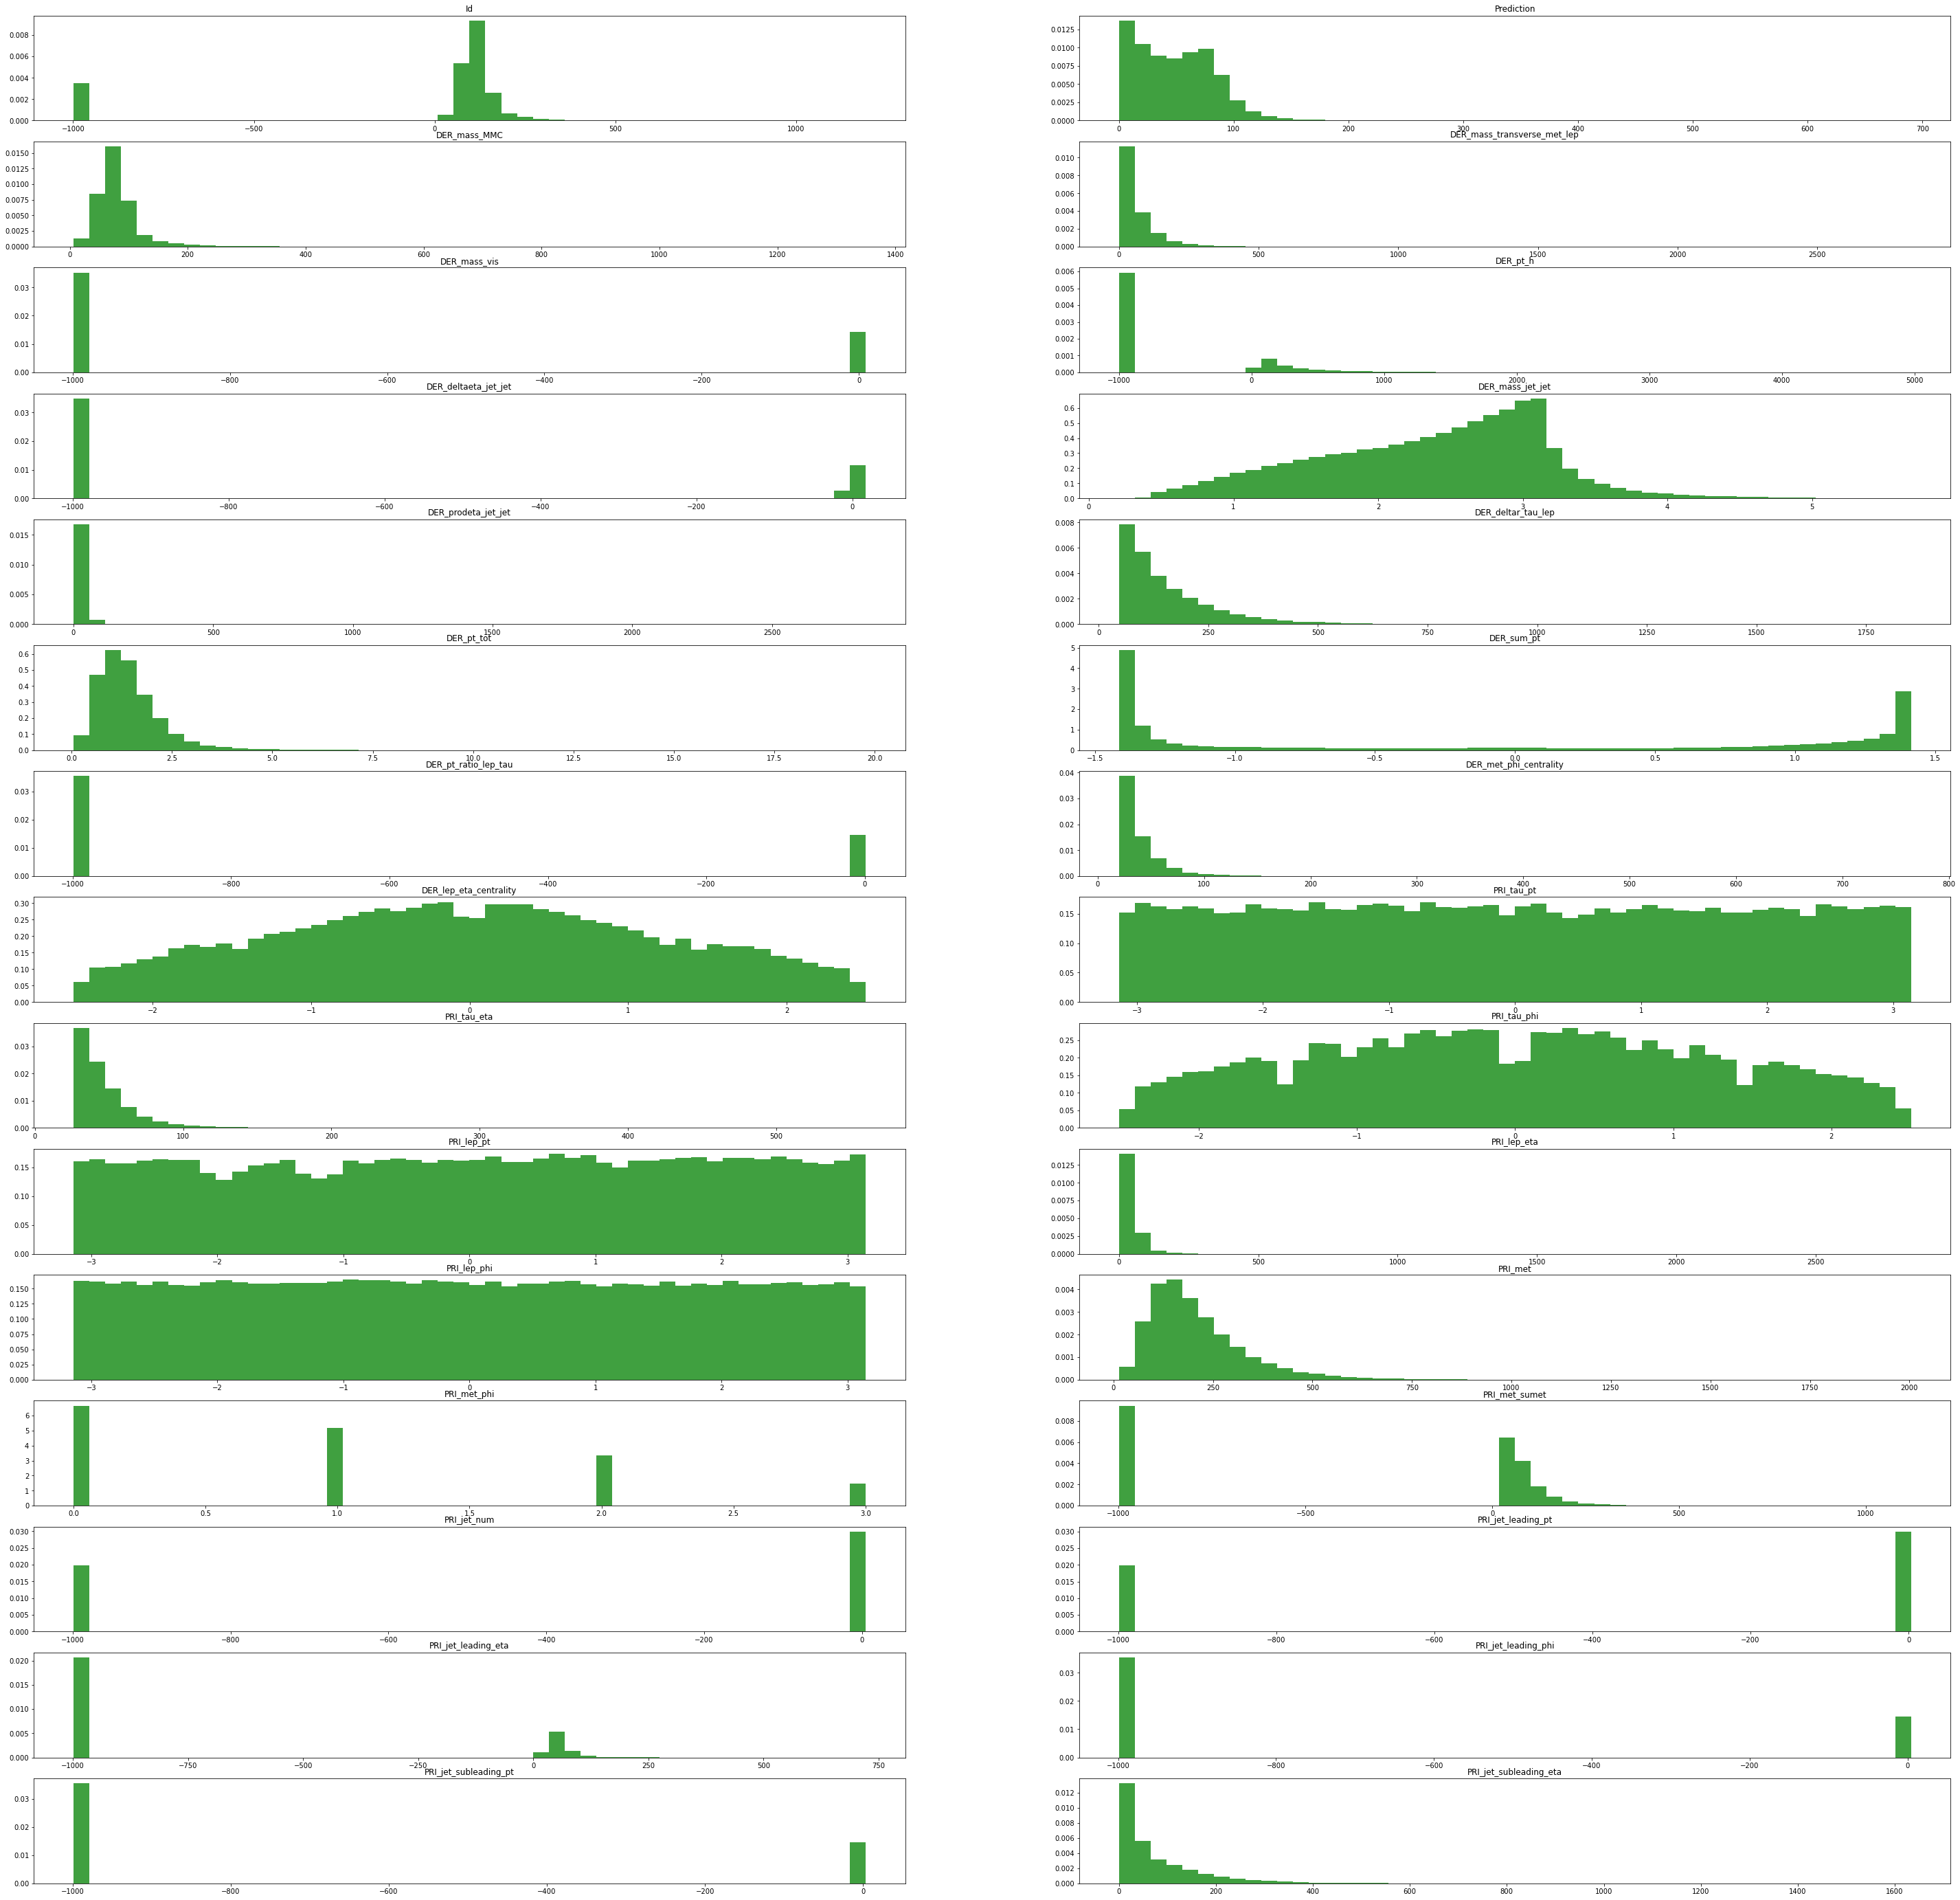

In [49]:
names = ["Id", "Prediction", "DER_mass_MMC", "DER_mass_transverse_met_lep", "DER_mass_vis", "DER_pt_h", "DER_deltaeta_jet_jet", "DER_mass_jet_jet", "DER_prodeta_jet_jet", "DER_deltar_tau_lep", "DER_pt_tot", "DER_sum_pt", "DER_pt_ratio_lep_tau", "DER_met_phi_centrality", "DER_lep_eta_centrality", "PRI_tau_pt", "PRI_tau_eta", "PRI_tau_phi", "PRI_lep_pt", "PRI_lep_eta", "PRI_lep_phi", "PRI_met", "PRI_met_phi", "PRI_met_sumet", "PRI_jet_num", "PRI_jet_leading_pt", "PRI_jet_leading_eta", "PRI_jet_leading_phi", "PRI_jet_subleading_pt", "PRI_jet_subleading_eta", "PRI_jet_subleading_phi", "PRI_jet_all_pt"]

fig, axs = plt.subplots(15, 2, figsize=(50,50))
print(range(2, len(names)))

for i in range(2, len(names)):
    axs[(i-2)//2, (i-2)%2].hist(x_tr[:,i-2], 50, density=True, facecolor='g', alpha=0.75)
    axs[(i-2)//2, (i-2)%2].set_title(names[i-2])

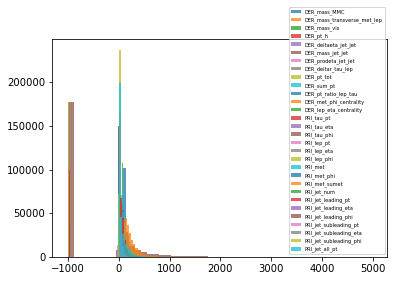

In [50]:
for i in range(2, len(names)):
    plt.hist(x_tr[:,i-2], 50, alpha=0.75, label = names[i])
    plt.legend(fontsize=5)
    

Outliers in -1000

# Preprocessing 

## Clean outliers

In [5]:
x_tr_nan = put_nan(x_tr)

Plot data without outliers

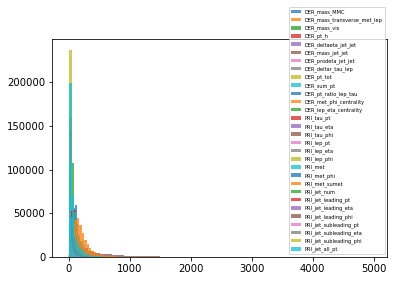

In [52]:
for i in range(2, len(names)):
    plt.hist(x_tr_nan[:,i-2], 50, alpha=0.75, label = names[i])
    plt.legend(fontsize=5)


PRI_jet_leading_phi has an outlier at 1000, we remove it

range(2, 32)


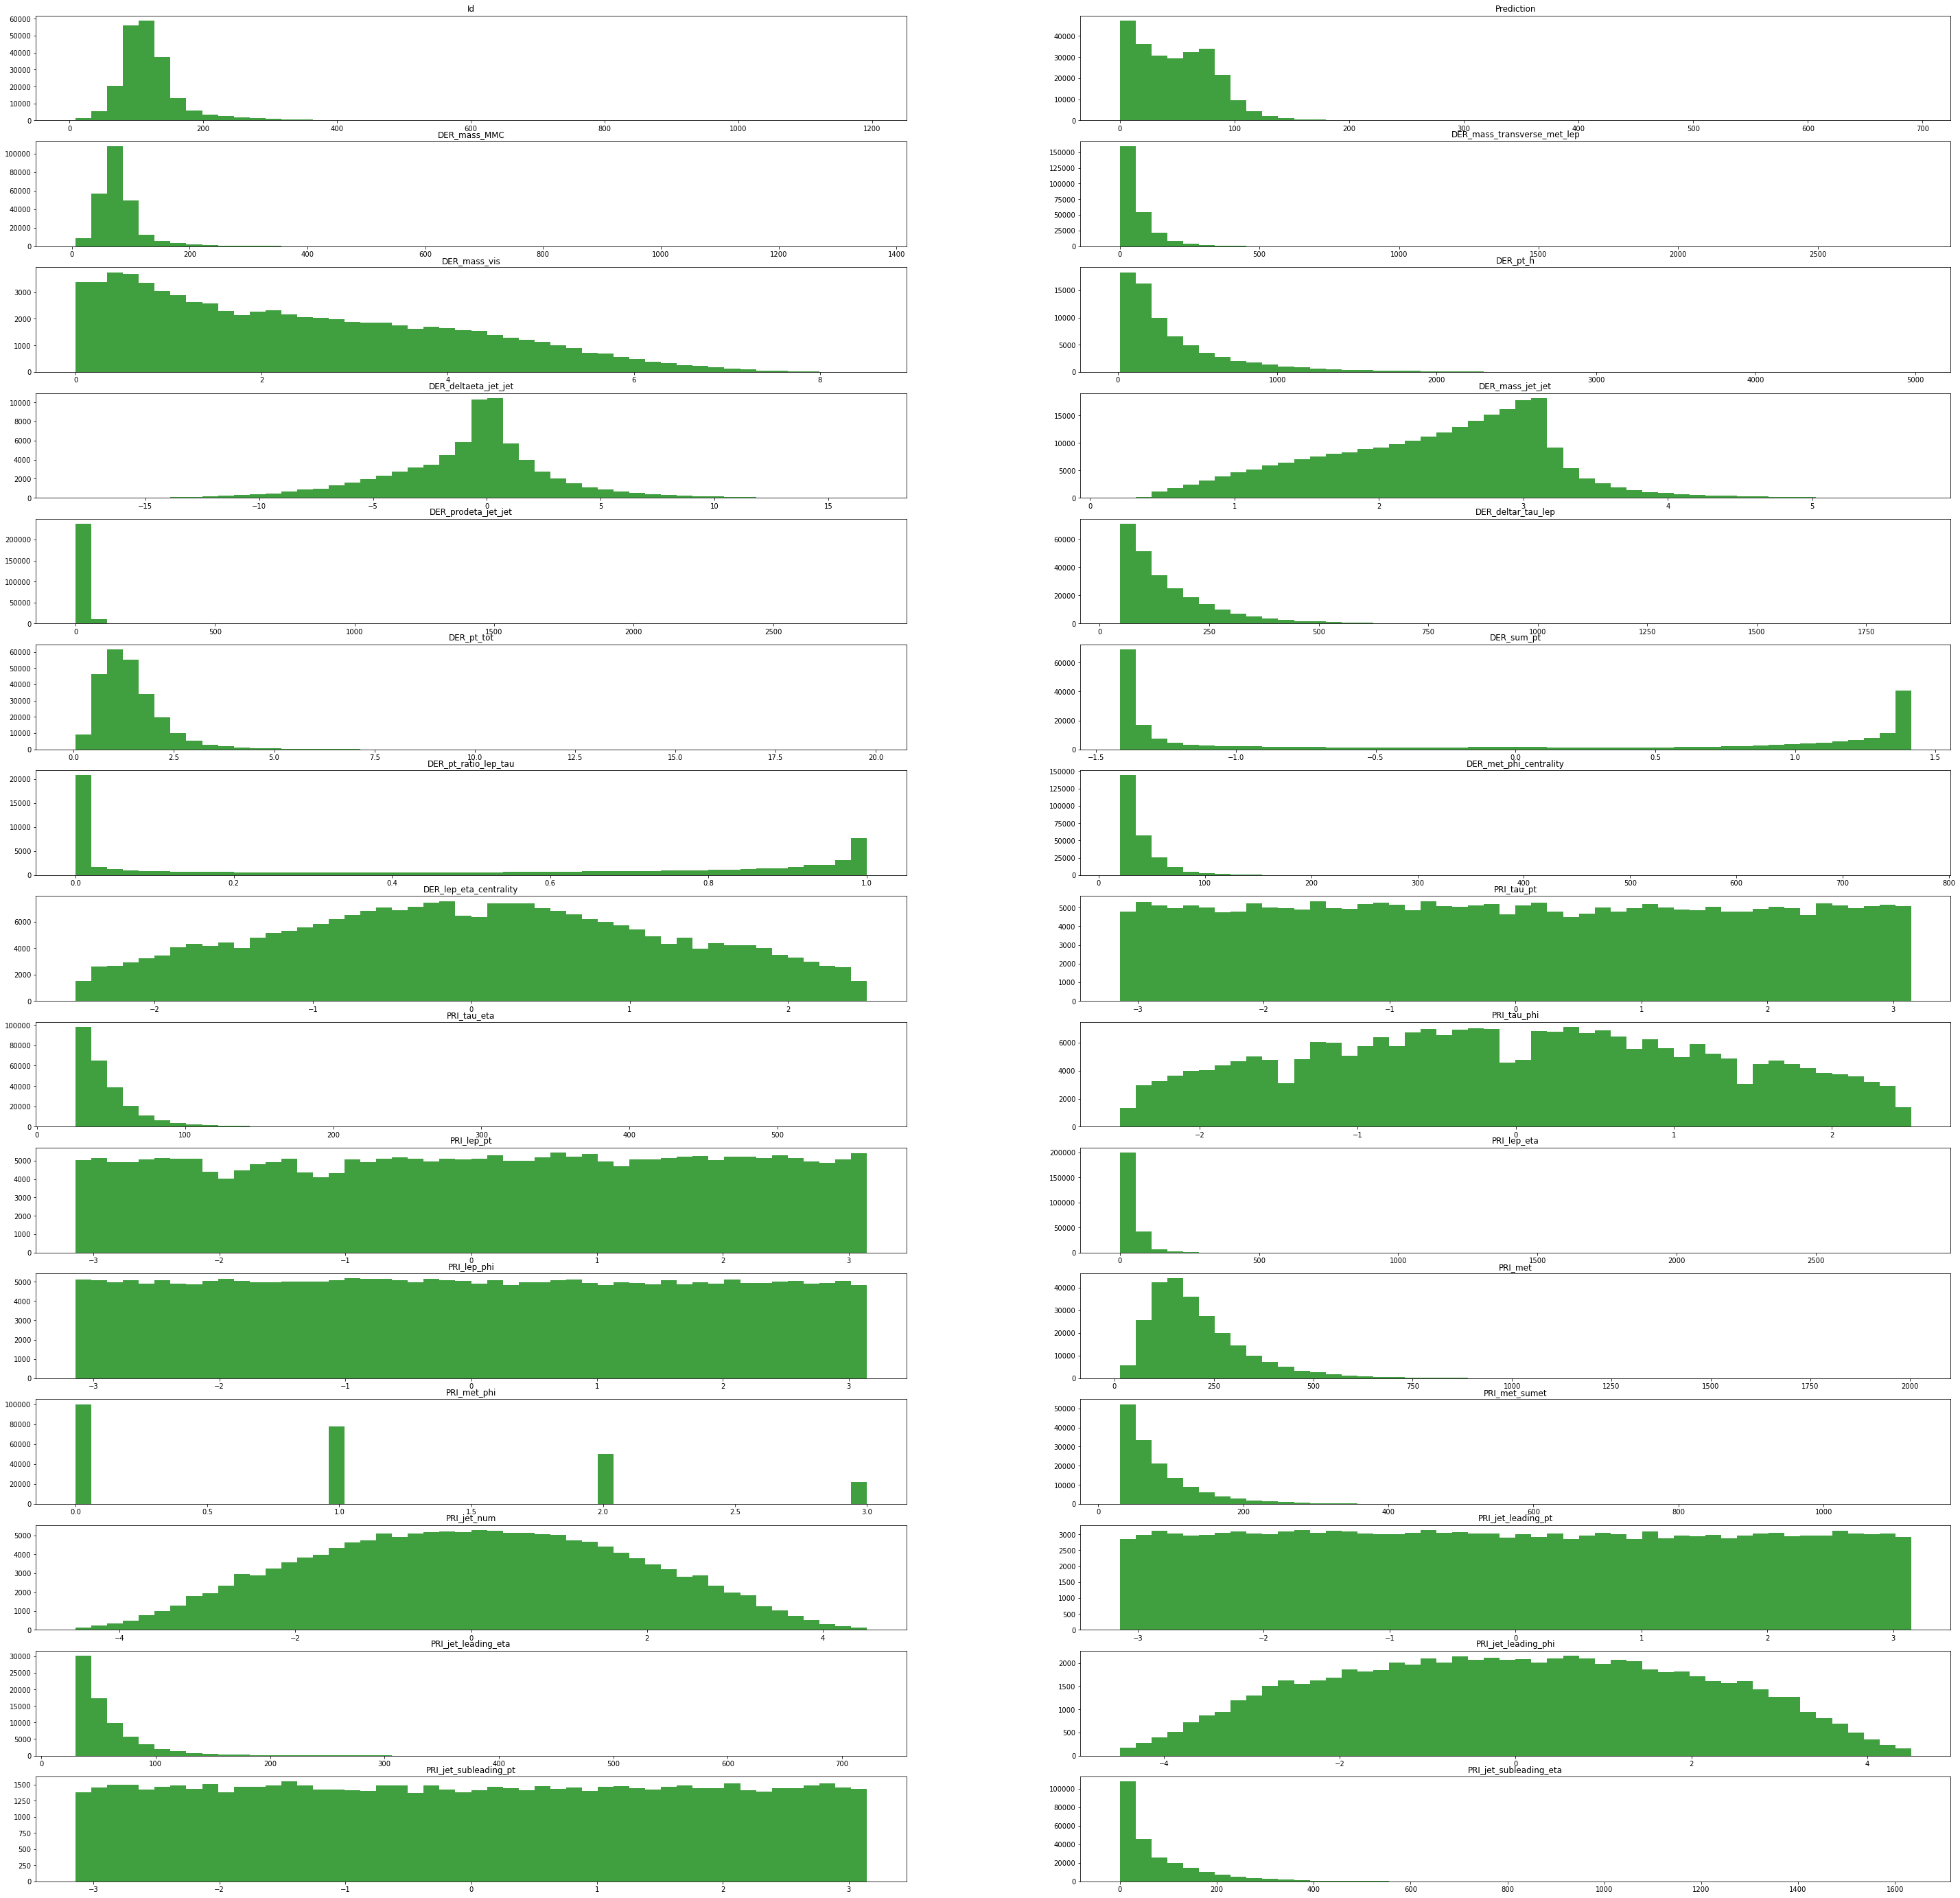

In [53]:
fig_n, axs_n = plt.subplots(15, 2, figsize=(50,50))
print(range(2, len(names)))

for i in range(2, len(names)):
    axs_n[(i-2)//2, (i-2)%2].hist(x_tr_nan[:,i-2], 50, facecolor='g', alpha=0.75)
    axs_n[(i-2)//2, (i-2)%2].set_title(names[i-2])

# Standardize data

We need to replace the missing data with smart values

Standardize the data using standardize from load.py  
We make sure to standardize the continuous data and not the classified one.

1. separating data for classification and regression

In [6]:
x_tr_class = x_tr_nan[:, 22]
x_tr_reg = np.delete(x_tr_nan, 22, axis=1)

## Looks for columns with a lot of missing values 
In regression features calculate how many nan values is there in each columns 

In [14]:
names = np.array(['DER_mass_MMC','DER_mass_transverse_met_lep','DER_mass_vis','DER_pt_h','DER_deltaeta_jet_jet','DER_mass_jet_jet','DER_prodeta_jet_jet','DER_deltar_tau_lep','DER_pt_tot','DER_sum_pt','DER_pt_ratio_lep_tau','DER_met_phi_centrality','DER_lep_eta_centrality','PRI_tau_pt','PRI_tau_eta','PRI_tau_phi','PRI_lep_pt','PRI_lep_eta','PRI_lep_phi','PRI_met','PRI_met_phi','PRI_met_sumet','PRI_jet_num','PRI_jet_leading_pt','PRI_jet_leading_eta','PRI_jet_subleading_pt','PRI_jet_subleading_eta','PRI_jet_subleading_phi','PRI_jet_all_pt'])

threshold = 0.7
prop_nan, ind = proportions_nan (x_tr_reg, threshold)
print ("Features which have more than ", threshold*100, "% of NAN values are ", names[ind]) 

Features which have more than  70.0 % of NAN values are  ['DER_deltaeta_jet_jet' 'DER_mass_jet_jet' 'DER_prodeta_jet_jet'
 'DER_lep_eta_centrality' 'PRI_jet_subleading_pt' 'PRI_jet_subleading_eta'
 'PRI_jet_subleading_phi']


Supress columns with a lot of missing values

In [15]:
x_tr_prop_nan = np.delete(x_tr_reg, ind, axis=1)

2. replace nan values with the median of the corresponding columns 

In [17]:
x_tr_prop = standardize(x_tr_prop_nan)

3.Split the data according to PRI_jet_num

In [273]:
#split the data according to PRI_jet_num
x_tr_split = np.array([x_tr_class[np.where(x_tr_class==0)], x_tr_class[np.where(x_tr_class==1)], 
                       x_tr_class[np.where(x_tr_class==2)], x_tr_class[np.where(x_tr_class==3)]], dtype=object)

y_tr_split = np.array([y_tr[np.where(x_tr_class==0)], y_tr[np.where(x_tr_class==1)], 
                       y_tr[np.where(x_tr_class==2)], y_tr[np.where(x_tr_class==3)]], dtype=object)


Train-test split

In [18]:
#ratio = 0.2
#seed = 1
#y_tr, y_te, x_tr, x_te = train_test_split(y_tr, x_tr_prop, ratio, seed)

suppressing the features with a lot of missing values  doesn't improve the loss 

## Coming back to our data set 

In [20]:
# dfdddedds<^x_tr_reg_s = standardize(x_tr_reg)

In [34]:
#ratio = 0.2
#seed = 1
#y_tr, y_te, x_tr, x_te = train_test_split(y_tr, x_tr_reg, ratio, seed)

## Polynomial expansion 

looking for best initial w for each degree ( standardization in the fonction ) 

In [11]:
x_norm, x_mean, x_std =  standardize(x_tr_reg)
x_median = np.nanmedian(x_norm, axis = 0)
x_tr_reg_ = fill_nan(x_norm, x_median)
print(x_tr_reg_)

[[ 2.89913530e-01  6.83319669e-02  4.07680272e-01 ...  6.16147878e-01
  -1.36131161e+00  4.12510497e-01]
 [ 6.82021310e-01  5.52504823e-01  5.40136414e-01 ...  9.08223761e-04
  -2.29898355e-04 -2.73819964e-01]
 [-1.64971287e-01  3.19515553e+00  1.09655998e+00 ...  9.08223761e-04
  -2.29898355e-04 -2.93969845e-01]
 ...
 [-2.86249472e-01  3.19316447e-01 -1.30863670e-01 ...  9.08223761e-04
  -2.29898355e-04 -3.17017229e-01]
 [-4.69606588e-01 -8.45323970e-01 -3.02973380e-01 ...  9.08223761e-04
  -2.29898355e-04 -7.45439413e-01]
 [-1.64971287e-01  6.65336083e-01 -2.53522760e-01 ...  9.08223761e-04
  -2.29898355e-04 -7.45439413e-01]]


In [15]:
degrees = np.arange(2,5)
lambda_ = 10**(-7)
max_iters = 1000
gamma = 10**(-1)
#x_norm, x_mean, x_std= standardize(x_tr_reg)
#x_median = np.nanmedian(x_norm, axis = 0)
#x_tr_reg_ = fill_nan(x_norm, x_median)
print(x_tr_reg_)
loss, ws = reg_log_degree(y_tr, x_tr_reg, degrees, lambda_, gamma, max_iters)

[[ 2.89913530e-01  6.83319669e-02  4.07680272e-01 ...  6.16147878e-01
  -1.36131161e+00  4.12510497e-01]
 [ 6.82021310e-01  5.52504823e-01  5.40136414e-01 ...  9.08223761e-04
  -2.29898355e-04 -2.73819964e-01]
 [-1.64971287e-01  3.19515553e+00  1.09655998e+00 ...  9.08223761e-04
  -2.29898355e-04 -2.93969845e-01]
 ...
 [-2.86249472e-01  3.19316447e-01 -1.30863670e-01 ...  9.08223761e-04
  -2.29898355e-04 -3.17017229e-01]
 [-4.69606588e-01 -8.45323970e-01 -3.02973380e-01 ...  9.08223761e-04
  -2.29898355e-04 -7.45439413e-01]
 [-1.64971287e-01  6.65336083e-01 -2.53522760e-01 ...  9.08223761e-04
  -2.29898355e-04 -7.45439413e-01]]
Degree is  2
[[        nan  0.28991353  0.06833197 ... -0.59647719  0.96113808
  -0.04665933]
 [        nan  0.68202131  0.55250482 ... -0.35958576 -0.27819319
  -0.28956955]
 [        nan -0.16497129  3.19515553 ... -0.35958576 -0.27819319
  -0.29360931]
 ...
 [        nan -0.28624947  0.31931645 ... -0.35958576 -0.27819319
  -0.29801375]
 [        nan -0.46960

KeyboardInterrupt: 

# Removing features with low variance 

In [39]:
#standardization 
x_tr_norm = np.zeros(x_tr_reg.shape)

for k in range(1, x_tr_reg.shape[1]): 
    x_tr_norm[:,k], x_tr_mean, x_tr_std = standardize(x_tr_reg[:,k])
x_tr_median = np.nanmedian(x_tr_norm, axis=0)
x_tr_filled = fill_nan(x_tr_norm, x_tr_median)
x_tr = x_tr_filled 

In [ ]:
x = np.arange()

In [40]:
#remove low variance data 
threshold = 0.01
var, x_tr_var = remove_low_variance(x_tr_filled, threshold)
print(x_tr_var.shape)

(250000, 28)


In [43]:
degrees = np.arange(2,5)
lambda_ = 10**(-7)
max_iters = 1000
gamma = 10**(-1)

loss, ws = reg_log_degree(y_tr, x_tr_var, degrees, lambda_, gamma, max_iters)



Degree is  2
update w for the  1  time
iteration :  0  , loss :  0.6543787093763356
iteration :  100  , loss :  0.5514753276558093
iteration :  200  , loss :  0.5283903393669206
iteration :  300  , loss :  0.5178550974077981
iteration :  400  , loss :  0.5114111925990441
iteration :  500  , loss :  0.5068332706628993
iteration :  600  , loss :  0.5032873651418743
iteration :  700  , loss :  0.5003989318965294
iteration :  800  , loss :  0.4979722944029633
iteration :  900  , loss :  0.4958857148602082
update w for the  2  time
iteration :  0  , loss :  0.49406156355267644
iteration :  100  , loss :  0.49244635762856354
iteration :  200  , loss :  0.49100433652722986
iteration :  300  , loss :  0.489709466117577
iteration :  400  , loss :  0.4885356361107104
iteration :  500  , loss :  0.48746630785011097
iteration :  600  , loss :  0.4864883329117153
iteration :  700  , loss :  0.48559000747323544
iteration :  800  , loss :  0.484762304688251
iteration :  900  , loss :  0.4839954150241

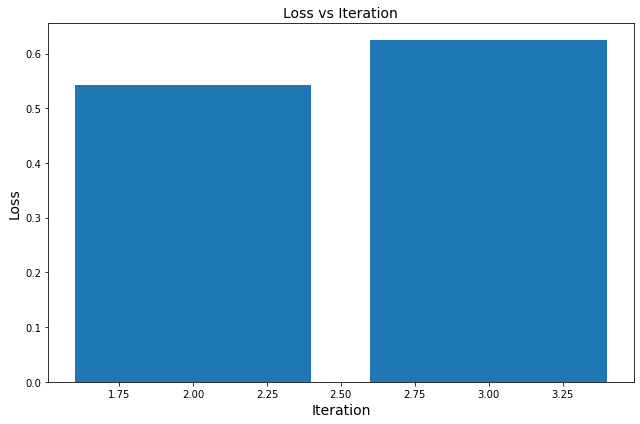

In [35]:
plt.figure(figsize = (9, 6))
plt.bar(degrees, loss)
plt.xlabel("Iteration", fontsize = 14)
plt.ylabel("Loss", fontsize = 14)
plt.title("Loss vs Iteration", fontsize = 14)
plt.tight_layout()
plt.show()

In [ ]:
def plot_loss_iteration(loss):    
    plt.figure(figsize = (9, 6))
    plt.plot(loss)
    plt.xlabel("Iteration", fontsize = 14)
    plt.ylabel("Loss", fontsize = 14)
    plt.title("Loss vs Iteration", fontsize = 14)
    plt.tight_layout()
    plt.show()

# Mean squared GD

In [64]:
initial_w = np.array([-0.07, 0.02, 0.03, 0.2, 0.3, -0.1, 0.3, 0.3, 0.25, -0.04, 0.3, 0.3, 0.3, 0.2, 0.3, 0.3, 0.15, 0.3, 0.3, 0.1, 0.3, -0.2, 0.1, 0.3, 1, 0.3, 0.1, 0.3, 0.3, 0.2])
gamma = 10**(-3)
max_iters = 100
bias = 1 
ws, losses = mean_squared_error_gd(y, x, initial_w, bias, max_iters, gamma)
print("The best loss of %.3f is obtained  a gamma of %.5f." % (losses, gamma))


The best loss of 0.942 is obtained  a gamma of 0.00100.


In [ ]:
lambda_ = 10**(-7)
initial_w = np.array([-0.07, 0.02, 0.03, 0.2, 0.3, -0.1, 0.3, 0.3, 0.25, -0.04, 0.3, 0.3, 0.3, 0.2, 0.3, 0.3, 0.15, 0.3, 0.3, 0.1, 0.3, -0.2, 0.1, 0.3, 1, 0.3, 0.1, 0.3, 0.3, 0.2])
max_iters = 100
fonction_to_optimize = 'mean_squared_error_gd'
start_gamma = 10**(-4)
end_gamma = 10**(-1)
number = 20

gamma_tab, losses_tab = search_gamma(y_tr, x_tr, lambda_, initial_w, max_iters, fonction_to_optimize, start_gamma, end_gamma, number) 


# Mean squared SGD

In [ ]:
initial_w = np.array([-0.07, 0.02, 0.03, 0.2, 0.3, -0.1, 0.3, 0.3, 0.25, -0.04, 0.3, 0.3, 0.3, 0.2, 0.3, 0.3, 0.15, 0.3, 0.3, 0.1, 0.3, -0.2, 0.1, 0.3, 1, 0.3, 0.1, 0.3, 0.3, 0.2])
gamma = 10**(-3)
max_iters = 100
batch_size = 50

ws, losses = mean_squared_error_sgd(y_tr, x_tr, initial_w, batch_size, max_iters, gamma)
#print("The best loss of %.3f is obtained  a gamma of %.5f." % (losses, gamma))

# Find right gamma

In [ ]:
from implementations import *
from load import *

tx = x_tr_filled
print(tx.shape)
y = y_tr

lambda_ = 10**(-7)
initial_w = np.array([-0.07, 0.02, 0.03, 0.2, 0.3, -0.1, 0.3, 0.3, 0.25, -0.04, 0.3, 0.3, 0.3, 0.2, 0.3, 0.3, 0.15, 0.3, 0.3, 0.1, 0.3, -0.2, 0.1, 0.3, 1, 0.3, 0.1, 0.3, 0.3, 0.2])
max_iters = 1000
fonction_to_optimize = 'reg_logistic_regression'
start_gamma = 10**(-4)
end_gamma = 10**(-1)
number = 20

gamma_tab, losses_tab = search_gamma(y, tx, lambda_, initial_w, max_iters, fonction_to_optimize, start_gamma, end_gamma, number)


In [ ]:
print(losses_tab)

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(gamma_tab, losses_tab, 'r--')
plt.xlabel('losses')
plt.ylabel('gamma')
plt.legend(['Gamma values'], fontsize=13)


# Regularized logistic regression using gradient descent or SGD


## Using gradient descent

In [ ]:
lambda_ = 10**(-7)
initial_w = np.full(x_tr_filled.shape[1], 0.1)
max_iters = 1000
fonction_to_optimize = 'reg_logistic_regression'
start_gamma = 10**(-4)
end_gamma = 10**(-1)
number = 20

gamma_tab, losses_tab = search_gamma(y_tr, x_tr_filled, lambda_, initial_w, max_iters, fonction_to_optimize, start_gamma, end_gamma, number)


In [ ]:
print(losses_tab)

# TRAIN Gradient descent 

In [ ]:
# from gradient_descent import *

from datetime import datetime
#from plots import *
from implementations import *

# Define the parameters of the algorithm.
lambda_ = 10**(-7)
initial_w = np.full(x_tr_filled.shape[1], 0.1)
w = np.array([0.004, -0.018, -0.0005, 0.12, 0.08, 0.2, 0.07, 0.08, 0.05, -0.04, 0.3, 0.3, 0.3, 0.2, 0.3, 0.3, 0.15, 0.3, 0.3, 0.1, 0.3, -0.2, 0.1, 0.3,1,  0.3, 0.1, 0.3, 0.13, 0.1])
print(w.shape)
max_iters = 10000
gamma = 10**(-1) #learing rate

tx = x_tr_1
y = y_tr_1


# Initialization

# Start gradient descent
start_time = datetime.now()

#for i in range(x_tr_split.shape[0]) :  
#    w, losses = reg_logistic_regression(y_tr_split[i], x_tr_split[i], lambda_, w, max_iters, gamma)

w, losses = reg_logistic_regression(y_tr_split[i], x_tr_split[i], lambda_, w, max_iters, gamma)

    
end_time = datetime.now()

# Print result
execution_time = (end_time - start_time).total_seconds()
print("GD: execution time={t:.3f} seconds".format(t=execution_time))
print(losses, w)

# TEST

In [ ]:
print(tx.shape)

print(x_te.shape)
x_te2 = np.delete(x_te, 22, axis=1)

proba = x_te2@w
y_hat=[]

for i in proba:
    if i>0:
        y_hat.append(1)
    else :
        y_hat.append(-1)

total_loss = np.sum(np.abs(y_te-y_hat))/len(y_te)

print(total_loss)

We fix the initial values of the parameters, based on running the algorithm several times and noting down the final parameter values. It gives us a better starting point and helps to achieve a better performance in a limited number of iterations.

# Cross validation 

In [ ]:
k_fold = 50
lambdas = np.logspace(-20, 0, 30)
best_lambda, best_rmse = cross_validation_demo(y_tr, x_tr, k_fold, lambdas)
best_lambda

# Create csv for submission

In [ ]:
from helpers import *

create_csv_submission(ids_te, y_hat, 'test_3')